No splineVector found in test\17_1.json
No splineVector found in test\46_2.json
No splineVector found in test\68_2.json
Plotted all tracks overlapping them.


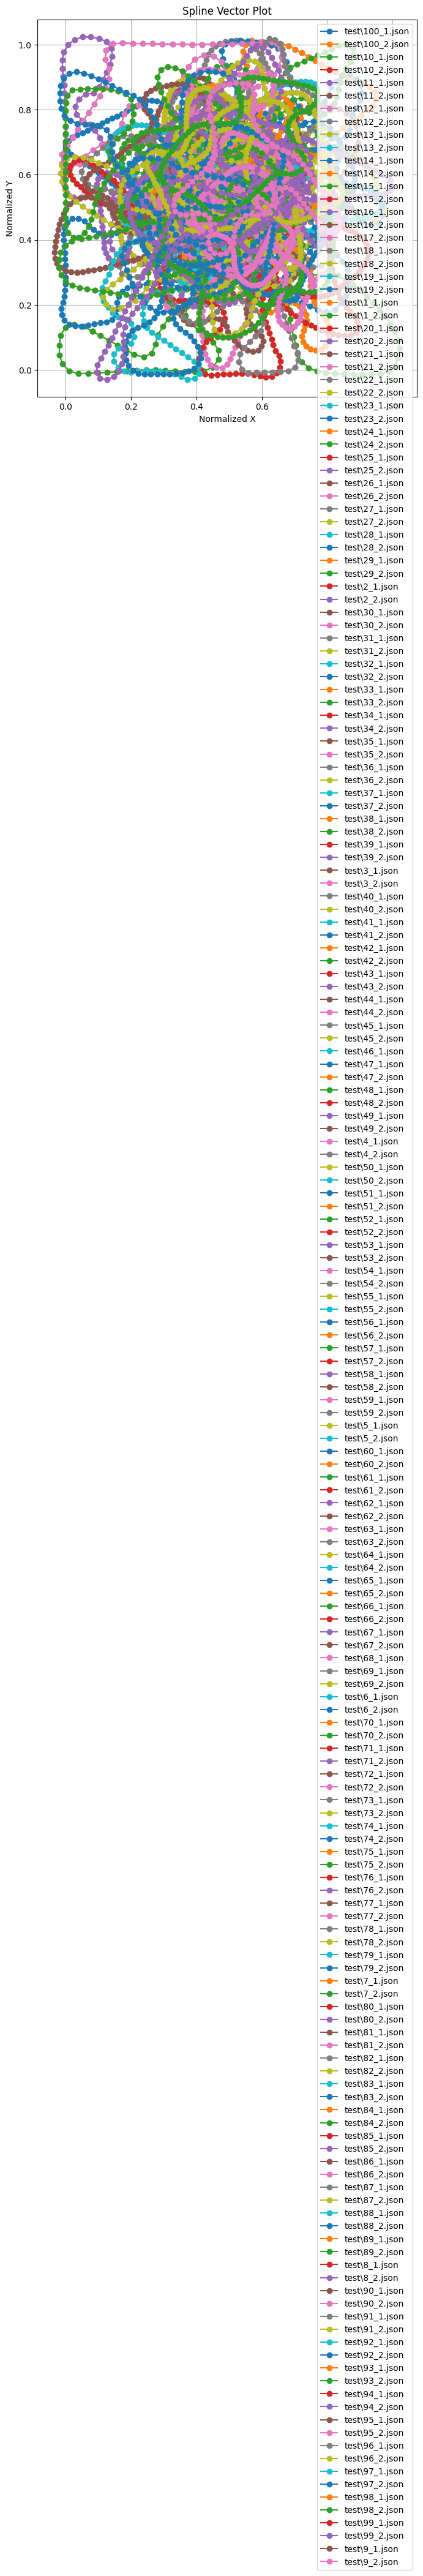

In [22]:
import json
import matplotlib.pyplot as plt
import glob

json_files = glob.glob("test/*.json")


# Set selected_index to a valid index (0, 1, 2, ...) to plot one track.
# If set to None (or an invalid index), all tracks will be plotted overlapping.
selected_index = None  # e.g., set to 0 to select the first track

def load_spline_vector(file_path):
    """Load the splineVector from a JSON file and return separate x and y lists."""
    with open(file_path, 'r') as f:
        data = json.load(f)
    if "splineVector" in data:
        pts = data["splineVector"]
        xs = [pt["x"] for pt in pts]
        ys = [pt["y"] for pt in pts]
        return xs, ys
    else:
        print(f"No splineVector found in {file_path}")
        return None, None

plt.figure(figsize=(8,8))
plt.title("Spline Vector Plot")
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.grid(True)

# If selected_index is valid, plot that one track; otherwise, plot all tracks.
if selected_index is not None and 0 <= selected_index < len(json_files):
    file_path = json_files[selected_index]
    xs, ys = load_spline_vector(file_path)
    if xs is not None:
        plt.plot(xs, ys, marker='o', label=f"{file_path}")
        plt.legend()
        print(f"Plotted track from {file_path}")
else:
    for file_path in json_files:
        xs, ys = load_spline_vector(file_path)
        if xs is not None:
            plt.plot(xs, ys, marker='o', label=f"{file_path}")
    plt.legend()
    print("Plotted all tracks overlapping them.")

plt.show()
